In [1]:
%matplotlib inline
import pymc3 as pm
import matplotlib.pyplot as plt
import numpy as np

# Regresión lineal Bayesiana

## Observaciones sintéticas

In [2]:
n = 100
a = 1
b = 2
s = 0.5

xe = np.linspace(0, 1, n)
ye = a + b * xe
y  = ye + np.random.normal(scale=s, size=n)

x    = np.append(xe, [.1, .15, .2])
yobs = np.append(y,  [8, 6, 9])

([<matplotlib.lines.Line2D at 0xa2a5201d0>],
 Text(0.5,0,'$x$'),
 Text(0,0.5,'$y$'))

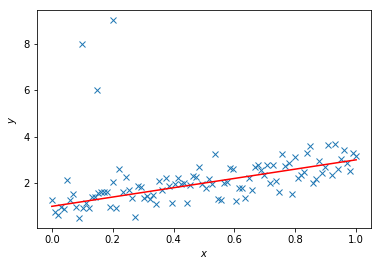

In [3]:
plt.plot(x, yobs, 'x')
plt.plot(xe, ye,  'r'), plt.xlabel(r'$x$'), plt.ylabel(r'$y$')

## Regresión normal ordinaria

In [4]:
mn = pm.Model()
with mn:
    alpha = pm.Flat('alpha')
    beta  = pm.Normal('beta')
    sigma = pm.HalfFlat('sigma')
    mu    = alpha + beta * x
    y     = pm.Normal('y', mu=mu, sd=sigma, observed=yobs)

In [5]:
with mn:
    tn = pm.sample(5000, random_seed=0)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, beta, alpha]
Sampling 4 chains: 100%|██████████| 22000/22000 [00:07<00:00, 3116.17draws/s]
The acceptance probability does not match the target. It is 0.891720191365108, but should be close to 0.8. Try to increase the number of tuning steps.


In [6]:
pm.summary(tn)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
alpha,1.653255,0.218326,0.001913,1.211774,2.069454,10252.385194,0.999953
beta,1.042092,0.372762,0.003316,0.308257,1.767399,9960.636578,0.999995
sigma,1.194252,0.085246,0.000790,1.029445,1.359286,12224.050394,0.999995


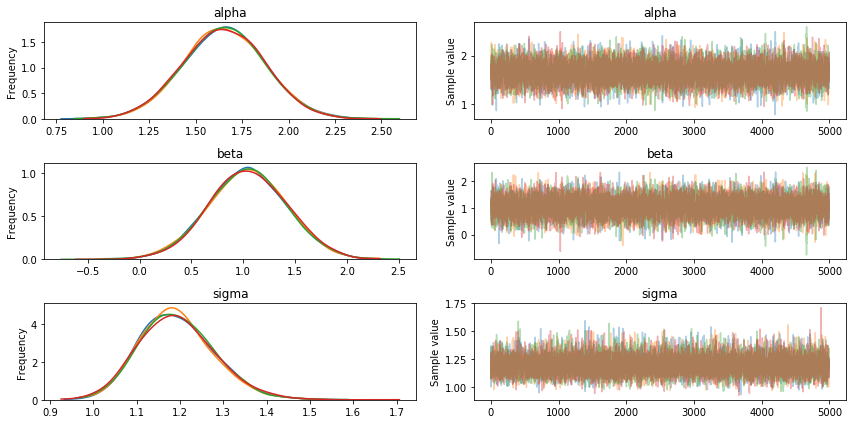

In [7]:
pm.traceplot(tn);

100%|██████████| 100/100 [00:00<00:00, 1156.77it/s]


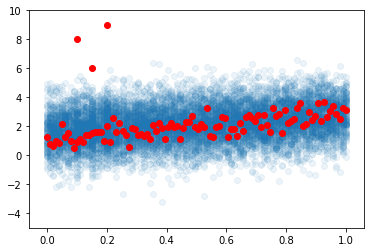

In [8]:
nppc = 100
ppc  = pm.sample_posterior_predictive(tn, samples=nppc, model=mn)
plt.scatter(np.tile(x, (nppc, 1)), ppc['y'], alpha=0.08)
plt.scatter(x, yobs, color='r')
plt.ylim(-5, 10);

## Modelo robusto

In [9]:
mt = pm.Model()
with mt:
    alpha = pm.Flat('alpha')
    beta  = pm.Normal('beta')
    sigma = pm.HalfFlat('sigma')
    nu    = pm.Gamma('nu', alpha=2, beta=0.1)
    mu    = alpha + beta * x
    y     = pm.StudentT('y', nu=nu, mu=mu, sd=sigma, observed=yobs)

In [10]:
with mt:
    tt = pm.sample(5000, random_seed=0)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [nu, sigma, beta, alpha]
Sampling 4 chains: 100%|██████████| 22000/22000 [00:08<00:00, 2586.67draws/s]


In [11]:
pm.summary(tt)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
alpha,1.062791,0.098921,0.000739,0.869114,1.256441,11604.743327,0.999984
beta,1.892097,0.179674,0.001369,1.552705,2.254787,11798.313753,1.000053
sigma,0.419252,0.047761,0.000406,0.328928,0.514967,14663.452913,1.000005
nu,2.584232,0.618376,0.005817,1.515537,3.839263,13771.109125,0.999978


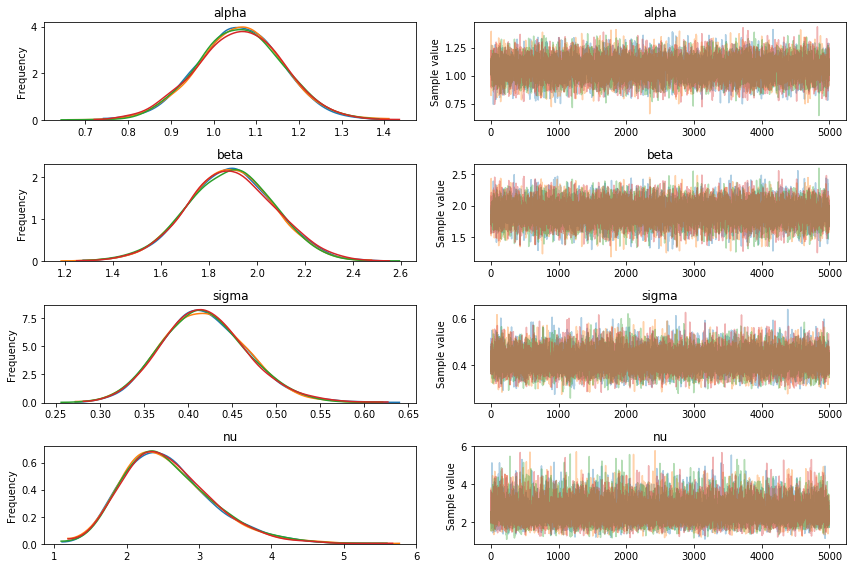

In [12]:
pm.traceplot(tt);

100%|██████████| 100/100 [00:00<00:00, 1368.14it/s]


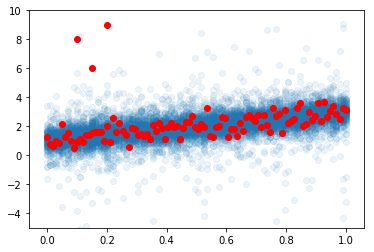

In [13]:
nppc = 100
ppc  = pm.sample_posterior_predictive(tt, samples=nppc, model=mt)
plt.scatter(np.tile(x, (nppc, 1)), ppc['y'], alpha=0.08)
plt.scatter(x, yobs, color='r')
plt.ylim(-5, 10);